In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
pwd

'C:\\Users\\seren\\Downloads\\Springboard\\capstone project 2\\Capstone project 2_'

In [3]:
df = pd.read_csv('California_Houses.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [5]:
#X = df.drop('Median_House_Value', axis=1).values
#y = df['Median_House_Value'].values


In [6]:
X = df.iloc[:,1:]
X.head()

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [7]:
y = df.iloc[:, 0]
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: Median_House_Value, dtype: float64

In [8]:
#split data into train 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16512, 13) (16512,)
(4128, 13) (4128,)


In [10]:
#future scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:, :] = sc.fit_transform(X_train.iloc[:, :])
X_test.iloc[:, :] = sc.transform(X_test.iloc[:, :])

In [11]:
X_train.head()

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
11130,-0.485033,0.350329,-0.066444,0.021706,0.379442,-0.145133,-0.834814,0.817970,-0.422381,-0.944821,-0.875173,0.821507,0.835623
5789,-0.844532,0.270854,-0.584006,-0.223200,-0.579792,-0.203091,-0.694493,0.658360,-0.261024,-1.048972,-0.723855,0.616993,0.657897
1246,-0.448522,1.860368,-1.120652,-1.198018,-1.150576,-1.196285,1.690963,-1.251969,1.721442,1.622265,1.560421,-0.621612,-0.875839
12884,-0.992255,-1.000758,0.243070,0.775629,0.361825,0.774296,1.414998,-0.882871,0.570652,1.262221,1.251368,-0.890114,-0.994981
6110,0.171801,0.429805,-0.220037,-0.362459,0.014775,-0.300567,-0.703848,0.837921,0.162136,-0.956737,-0.784639,0.728316,0.754407


In [12]:
X_test.head()

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
3382,0.415208,0.509281,-0.862336,-0.945910,-0.929485,-0.919666,-0.647719,0.648384,-0.139746,-1.003536,-0.687937,0.573480,0.620070
17806,0.876529,-1.000758,0.299387,-0.019112,0.384727,0.073528,0.816296,-1.147225,-0.403731,0.904389,0.946661,-1.577612,-1.278439
15758,-0.339985,1.860368,-0.293110,-0.040721,-0.429168,0.005032,0.998713,-1.431530,-0.762662,1.171223,1.173711,-1.288697,-1.538625
20490,0.841959,-0.206001,-0.498367,-0.780239,-0.536631,-0.677295,-0.638365,0.443884,-0.274197,-0.903424,-0.605952,0.452193,0.514414
11771,0.094372,-1.716039,0.722932,0.511516,0.634886,0.545097,1.457094,-0.867908,0.779625,1.292512,1.276495,-0.842721,-0.958816


In [13]:
rf = RandomForestRegressor().fit(X_train, y_train)
rf2 =RandomForestRegressor().fit(X_test, y_test)
print("Random forest model, Train R^2:", rf.score(X_train, y_train))
print("Random forest model, Test R^2:", rf2.score(X_test, y_test))

Random forest model, Train R^2: 0.9765380924832411
Random forest model, Test R^2: 0.971459816748472


In [14]:
lr = LinearRegression().fit(X_train, y_train)
lr2 = LinearRegression().fit(X_test, y_test)
print("Linear regression model, Train R^2:", lr.score(X_train, y_train))
print("Linear regression model, Train R^2:", lr2.score(X_test, y_test))

Linear regression model, Train R^2: 0.6464214594176845
Linear regression model, Train R^2: 0.6489390752953288


In [15]:
from sklearn.linear_model import Lasso
la = Lasso().fit(X_train, y_train)
la2=Lasso().fit(X_test, y_test)
print("Lasso model, Train R^2:", la.score(X_train, y_train)) 
print("Lasso regression model, Test R^2:", la2.score(X_test, y_test))

Lasso model, Train R^2: 0.6464209525454032
Lasso regression model, Test R^2: 0.6489384953759173


C:\Users\seren\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.356e+13, tolerance: 2.184e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\seren\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.440e+12, tolerance: 5.636e+09
  model = cd_fast.enet_coordinate_descent(


In [17]:
from xgboost import XGBRegressor

regressor = XGBRegressor()
xg=regressor.fit(X_train, y_train)
xg1=regressor.fit(X_test, y_test)

In [18]:
print("XGBregressor model, Train R^2:", xg.score(X_train, y_train))
print("XGBregressor model, Test R^2:", xg1.score(X_test, y_test))

XGBregressor model, Train R^2: 0.7989798071771814
XGBregressor model, Test R^2: 0.9844585101704635


R^2 value on each model

In [19]:
#R^2 value on xgboost
from sklearn.metrics import r2_score 
y_pred_xgboost = regressor.predict(X_test)
r2_score(y_test, y_pred_xgboost)

0.9844585101704635

it looks like the random forest model with higher R^2 score 0.97. it performs better than other models so I will pick this model

In [20]:
feature_importance = dict(zip(df.columns, list(rf.feature_importances_)))
feature_importance

{'Median_House_Value': 0.474620073111123,
 'Median_Income': 0.030646283055767675,
 'Median_Age': 0.01891849042469984,
 'Tot_Rooms': 0.014335274858965463,
 'Tot_Bedrooms': 0.021501653768525694,
 'Population': 0.012737173614175258,
 'Households': 0.06394525825640922,
 'Latitude': 0.037991713772866156,
 'Longitude': 0.20569337010353916,
 'Distance_to_coast': 0.029499462902198122,
 'Distance_to_LA': 0.02894157198326296,
 'Distance_to_SanDiego': 0.02577270941590748,
 'Distance_to_SanJose': 0.03539696473256007}

<AxesSubplot:title={'center':'Feature Importance (RandomForest)'}, ylabel='Relative Importance'>

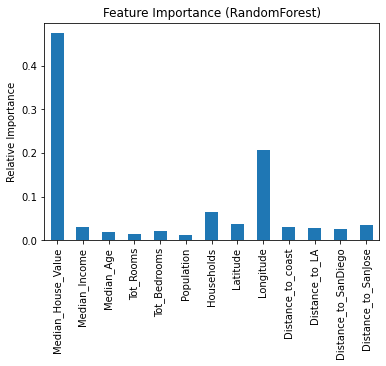

In [23]:
feature_df = pd.DataFrame(feature_importance, index=[0])
feature_df.T.plot.bar(title="Feature Importance (RandomForest)", ylabel='Relative Importance', legend=False)

Based on the graph, the importance feature that impact our CA housing price is house income, location, and households

In [24]:
#rf2 =RandomForestRegressor().fit(X_test, y_test)
y_pred_random=rf2.predict(X_test)

Text(0.5, 1.0, 'Random Forest: Predictions vs Observed Values')

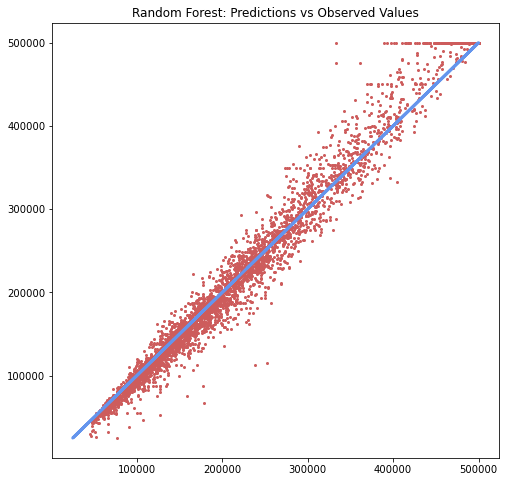

In [26]:
plt.subplots(figsize=(8,8))
plt.scatter(y_pred_random,y_test,s=4, color='indianred')
plt.plot(y_test, y_test,color='cornflowerblue', linewidth=3)
plt.title('{}: Predictions vs Observed Values'.format("Random Forest"))

In [29]:
print("Accuracy score for {} is {:.2f}, RMSE is {:.2f}".
      format("Random Forest",r2_score(y_test, y_pred_random),
             mean_squared_error(y_test, y_pred_random, squared=False)))

Accuracy score for Random Forest is 0.97, RMSE is 19739.85
